# Graph Algorithms: SCC, Reversal, Euler Tour, and Topological Sort

Solutions to graph theory problems with implementations and visualizations

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import deque, defaultdict
import random

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

## Problem 1: SCC and Reversal

### 1. Algorithm to Compute the Reversal rev(G) in O(V + E) time

In [2]:
def compute_reversal(adj_list):
    """
    Compute the reversal (transpose) of a directed graph in O(V + E) time.

    Algorithm:
    1. Create an empty adjacency list for the reversed graph
    2. For each vertex u and each edge (u, v) in the original graph:
       - Add edge (v, u) to the reversed graph

    Time Complexity: O(V + E)
    - We iterate through all vertices: O(V)
    - We process each edge exactly once: O(E)
    - Total: O(V + E)

    Parameters:
    adj_list: dictionary where adj_list[u] = list of vertices v such that (u,v) is an edge

    Returns:
    rev_adj_list: adjacency list of the reversed graph
    """
    rev_adj_list = defaultdict(list)

    for u in adj_list:
        if u not in rev_adj_list:
            rev_adj_list[u] = []

    for u in adj_list:
        for v in adj_list[u]:
            rev_adj_list[v].append(u)
            if v not in rev_adj_list:
                rev_adj_list[v] = [u]

    return dict(rev_adj_list)

print("Example: Computing Graph Reversal")
print("="*60)

G_example = {
    'A': ['B', 'C'],
    'B': ['C', 'D'],
    'C': ['D'],
    'D': ['A'],
    'E': ['D']
}

print("Original Graph:")
for u, neighbors in G_example.items():
    print(f"  {u} -> {neighbors}")

G_rev = compute_reversal(G_example)

print("\nReversed Graph:")
for u, neighbors in sorted(G_rev.items()):
    print(f"  {u} -> {neighbors}")

print("\nTime Complexity Analysis:")
print("  - Vertices processed: O(V)")
print("  - Edges processed: O(E)")
print("  - Total: O(V + E)")

Example: Computing Graph Reversal
Original Graph:
  A -> ['B', 'C']
  B -> ['C', 'D']
  C -> ['D']
  D -> ['A']
  E -> ['D']

Reversed Graph:
  A -> ['D']
  B -> ['A']
  C -> ['A', 'B']
  D -> ['B', 'C', 'E']
  E -> []

Time Complexity Analysis:
  - Vertices processed: O(V)
  - Edges processed: O(E)
  - Total: O(V + E)


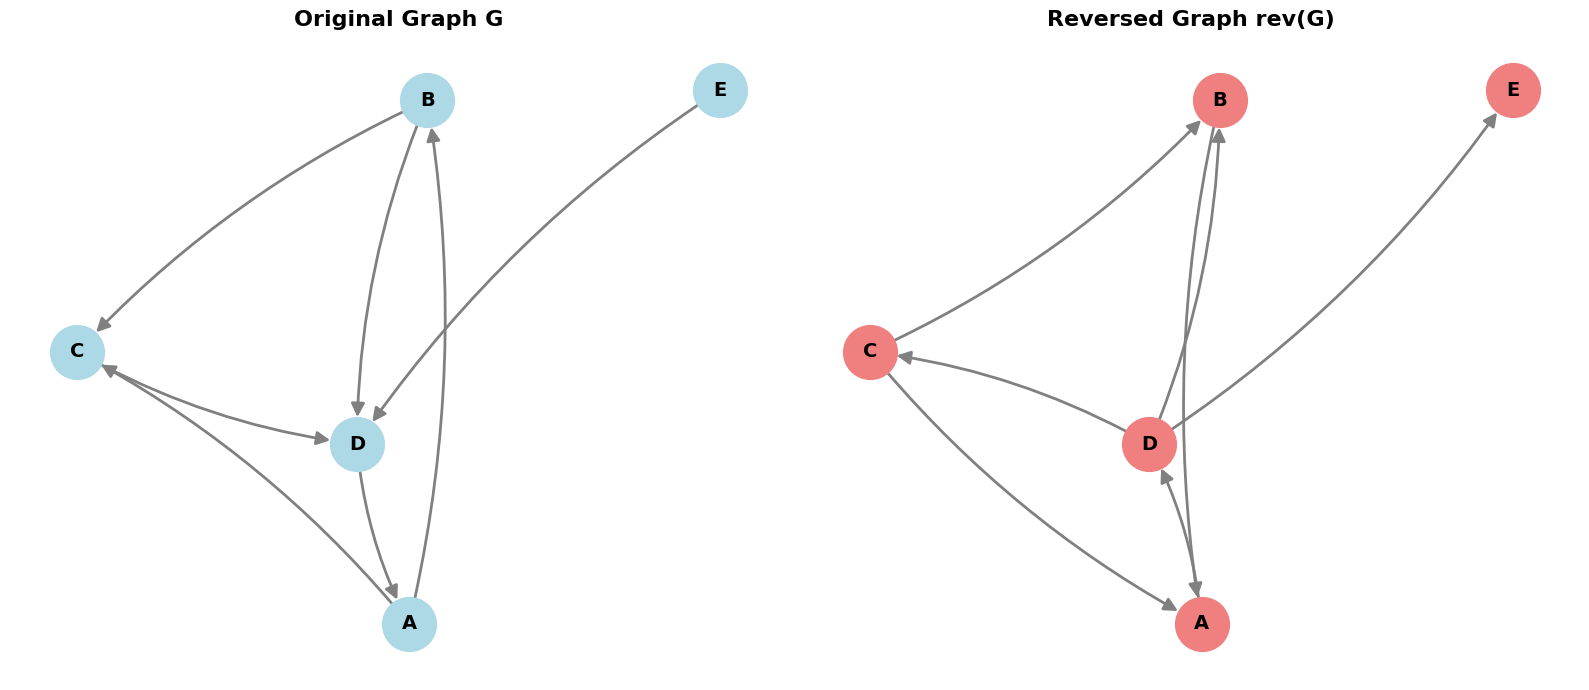

In [3]:
# Visualize the original and reversed graph
def visualize_graph_and_reversal(adj_list):
    """Visualize a directed graph and its reversal side by side"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

    G = nx.DiGraph()
    for u, neighbors in adj_list.items():
        for v in neighbors:
            G.add_edge(u, v)

    G_rev_dict = compute_reversal(adj_list)
    G_rev = nx.DiGraph()
    for u, neighbors in G_rev_dict.items():
        for v in neighbors:
            G_rev.add_edge(u, v)

    pos = nx.spring_layout(G, seed=42)

    nx.draw(G, pos, ax=ax1, with_labels=True, node_color='lightblue',
            node_size=1500, font_size=14, font_weight='bold',
            arrows=True, arrowsize=20, edge_color='gray', width=2,
            connectionstyle='arc3,rad=0.1')
    ax1.set_title('Original Graph G', fontsize=16, fontweight='bold')

    nx.draw(G_rev, pos, ax=ax2, with_labels=True, node_color='lightcoral',
            node_size=1500, font_size=14, font_weight='bold',
            arrows=True, arrowsize=20, edge_color='gray', width=2,
            connectionstyle='arc3,rad=0.1')
    ax2.set_title('Reversed Graph rev(G)', fontsize=16, fontweight='bold')

    plt.tight_layout()
    plt.show()

visualize_graph_and_reversal(G_example)

### 2. Prove that scc(G) is acyclic

**Theorem:** For every directed graph G, the strong component graph scc(G) is acyclic.

**Proof by Contradiction:**

1. **Definition**: scc(G) is a graph where:
   - Each vertex represents a strongly connected component (SCC) of G
   - There is an edge from SCC S₁ to SCC S₂ if there exists an edge from some vertex in S₁ to some vertex in S₂ in the original graph G

2. **Assumption**: Suppose scc(G) contains a cycle. Let this cycle be: S₁ → S₂ → ... → Sₖ → S₁

3. **Implication**:
   - Since there's an edge from S₁ to S₂ in scc(G), there exist vertices u₁ ∈ S₁ and u₂ ∈ S₂ such that (u₁, u₂) is an edge in G
   - Similarly, there exist edges connecting vertices in consecutive SCCs around the cycle
   - Following the cycle: we can find a path from any vertex in S₁ to any vertex in S₂, from S₂ to S₃, ..., and from Sₖ back to S₁

4. **Contradiction**:
   - If there's a path from vertices in S₁ to vertices in S₂ AND a path from vertices in S₂ back to S₁ (going through the cycle)
   - Then vertices in S₁ and S₂ can reach each other
   - By definition, this means S₁ and S₂ should be in the same strongly connected component
   - This contradicts our assumption that S₁ and S₂ are different SCCs

5. **Conclusion**: Our assumption must be false. Therefore, scc(G) cannot contain any cycles, i.e., scc(G) is acyclic (a DAG).

**QED**

Strongly Connected Components:
  SCC 0: ['D', 'E', 'F']
  SCC 1: ['A', 'B', 'C']
  SCC 2: ['G']

scc(G) is acyclic (DAG): True


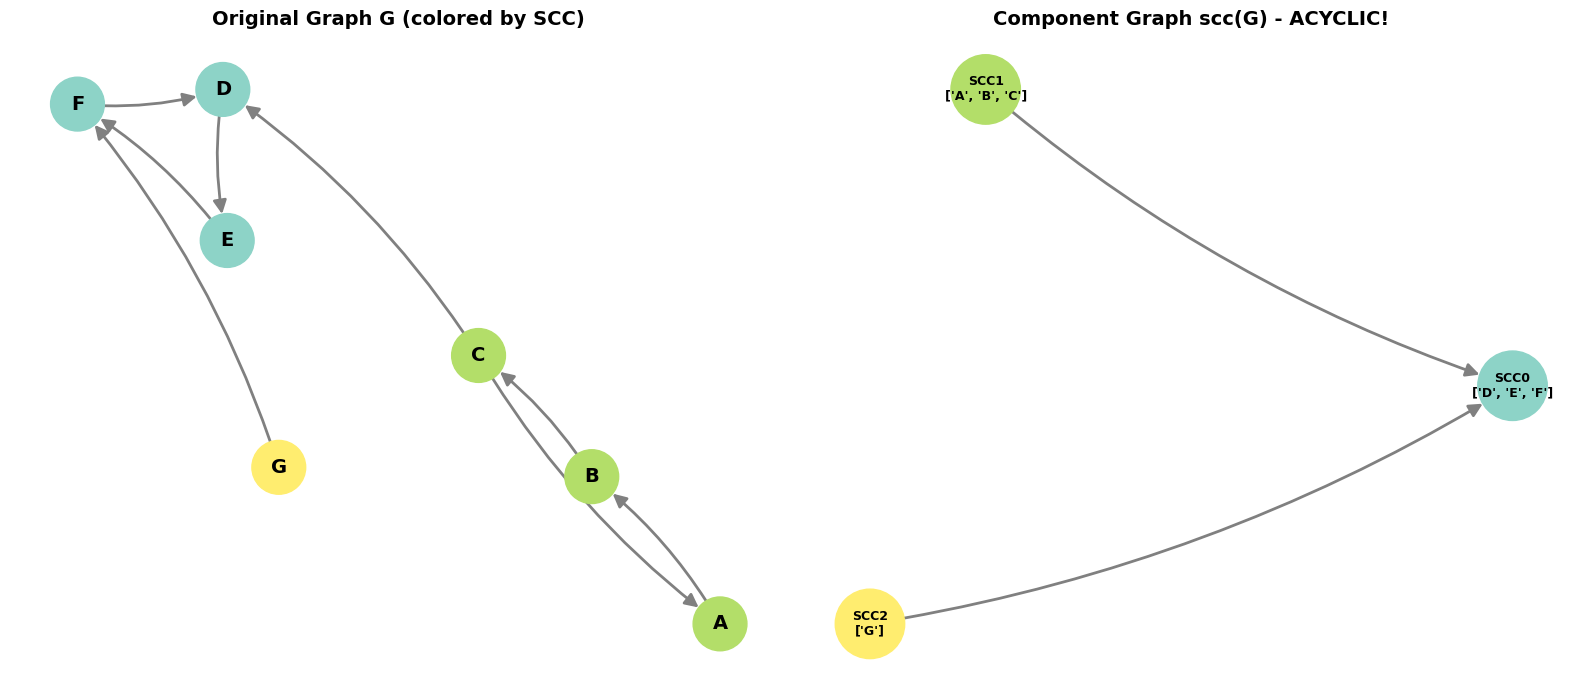

In [4]:
# Demonstrate with an example
def compute_scc_and_visualize(adj_list):
    """Compute SCCs and visualize both the original graph and scc(G)"""

    G = nx.DiGraph()
    for u, neighbors in adj_list.items():
        for v in neighbors:
            G.add_edge(u, v)

    sccs = list(nx.strongly_connected_components(G))

    print("Strongly Connected Components:")
    for i, scc in enumerate(sccs):
        print(f"  SCC {i}: {sorted(scc)}")

    scc_graph = nx.DiGraph()

    vertex_to_scc = {}
    for i, scc in enumerate(sccs):
        for v in scc:
            vertex_to_scc[v] = i

    for u, neighbors in adj_list.items():
        for v in neighbors:
            scc_u = vertex_to_scc[u]
            scc_v = vertex_to_scc[v]
            if scc_u != scc_v:
                scc_graph.add_edge(scc_u, scc_v)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

    colors = plt.cm.Set3(np.linspace(0, 1, len(sccs)))
    node_colors = [colors[vertex_to_scc[node]] for node in G.nodes()]

    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, ax=ax1, with_labels=True, node_color=node_colors,
            node_size=1500, font_size=14, font_weight='bold',
            arrows=True, arrowsize=20, edge_color='gray', width=2,
            connectionstyle='arc3,rad=0.1')
    ax1.set_title('Original Graph G (colored by SCC)', fontsize=14, fontweight='bold')

    if len(scc_graph.nodes()) > 0:
        pos_scc = nx.spring_layout(scc_graph, seed=42)
        scc_node_colors = [colors[i] for i in scc_graph.nodes()]
        labels = {i: f"SCC{i}\n{sorted(sccs[i])}" for i in scc_graph.nodes()}

        nx.draw(scc_graph, pos_scc, ax=ax2, labels=labels,
                node_color=scc_node_colors, node_size=2500,
                font_size=9, font_weight='bold',
                arrows=True, arrowsize=20, edge_color='gray', width=2,
                connectionstyle='arc3,rad=0.1')
        ax2.set_title('Component Graph scc(G) - ACYCLIC!', fontsize=14, fontweight='bold')


        is_dag = nx.is_directed_acyclic_graph(scc_graph)
        print(f"\nscc(G) is acyclic (DAG): {is_dag}")
    else:
        ax2.text(0.5, 0.5, 'Single SCC\n(No component graph)',
                ha='center', va='center', fontsize=14)
        ax2.set_title('Component Graph scc(G)', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

G_multi_scc = {
    'A': ['B'],
    'B': ['C'],
    'C': ['A'],
    'D': ['E'],
    'E': ['F'],
    'F': ['D'],
    'C': ['A', 'D'],
    'G': ['F']
}

compute_scc_and_visualize(G_multi_scc)

### 3. Prove that scc(rev(G)) = rev(scc(G))

**Theorem:** For every directed graph G, scc(rev(G)) = rev(scc(G))

**Proof:**

We need to show two things:
1. The vertices (SCCs) are the same in both graphs
2. The edges are reversed

**Part 1: The SCCs are the same**

- A strongly connected component S in G means: for any u, v ∈ S, there exists a path from u to v AND from v to u
- In rev(G), all edges are reversed
- If there's a path from u to v in G, there's a path from v to u in rev(G)
- If there's a path from v to u in G, there's a path from u to v in rev(G)
- Therefore, u and v are in the same SCC in rev(G) if and only if they're in the same SCC in G
- The SCCs of G and rev(G) are identical

**Part 2: The edges are reversed**

- Consider an edge from SCC S₁ to SCC S₂ in scc(G)
- This means there exist vertices u ∈ S₁ and v ∈ S₂ with edge (u, v) in G
- In rev(G), this edge becomes (v, u)
- Since the SCCs are the same, v is still in the component corresponding to S₂, and u in S₁
- In scc(rev(G)), this creates an edge from S₂ to S₁
- This is exactly the reverse of the edge from S₁ to S₂ in scc(G)

**Conclusion:**
- scc(rev(G)) has the same vertices as scc(G)
- Every edge in scc(G) is reversed in scc(rev(G))
- Therefore, scc(rev(G)) = rev(scc(G))

**QED**

SCCs of G: [['A', 'B', 'C'], ['D', 'E', 'F'], ['G']]
SCCs of rev(G): [['A', 'B', 'C'], ['D', 'E', 'F'], ['G']]
SCCs are the same: True


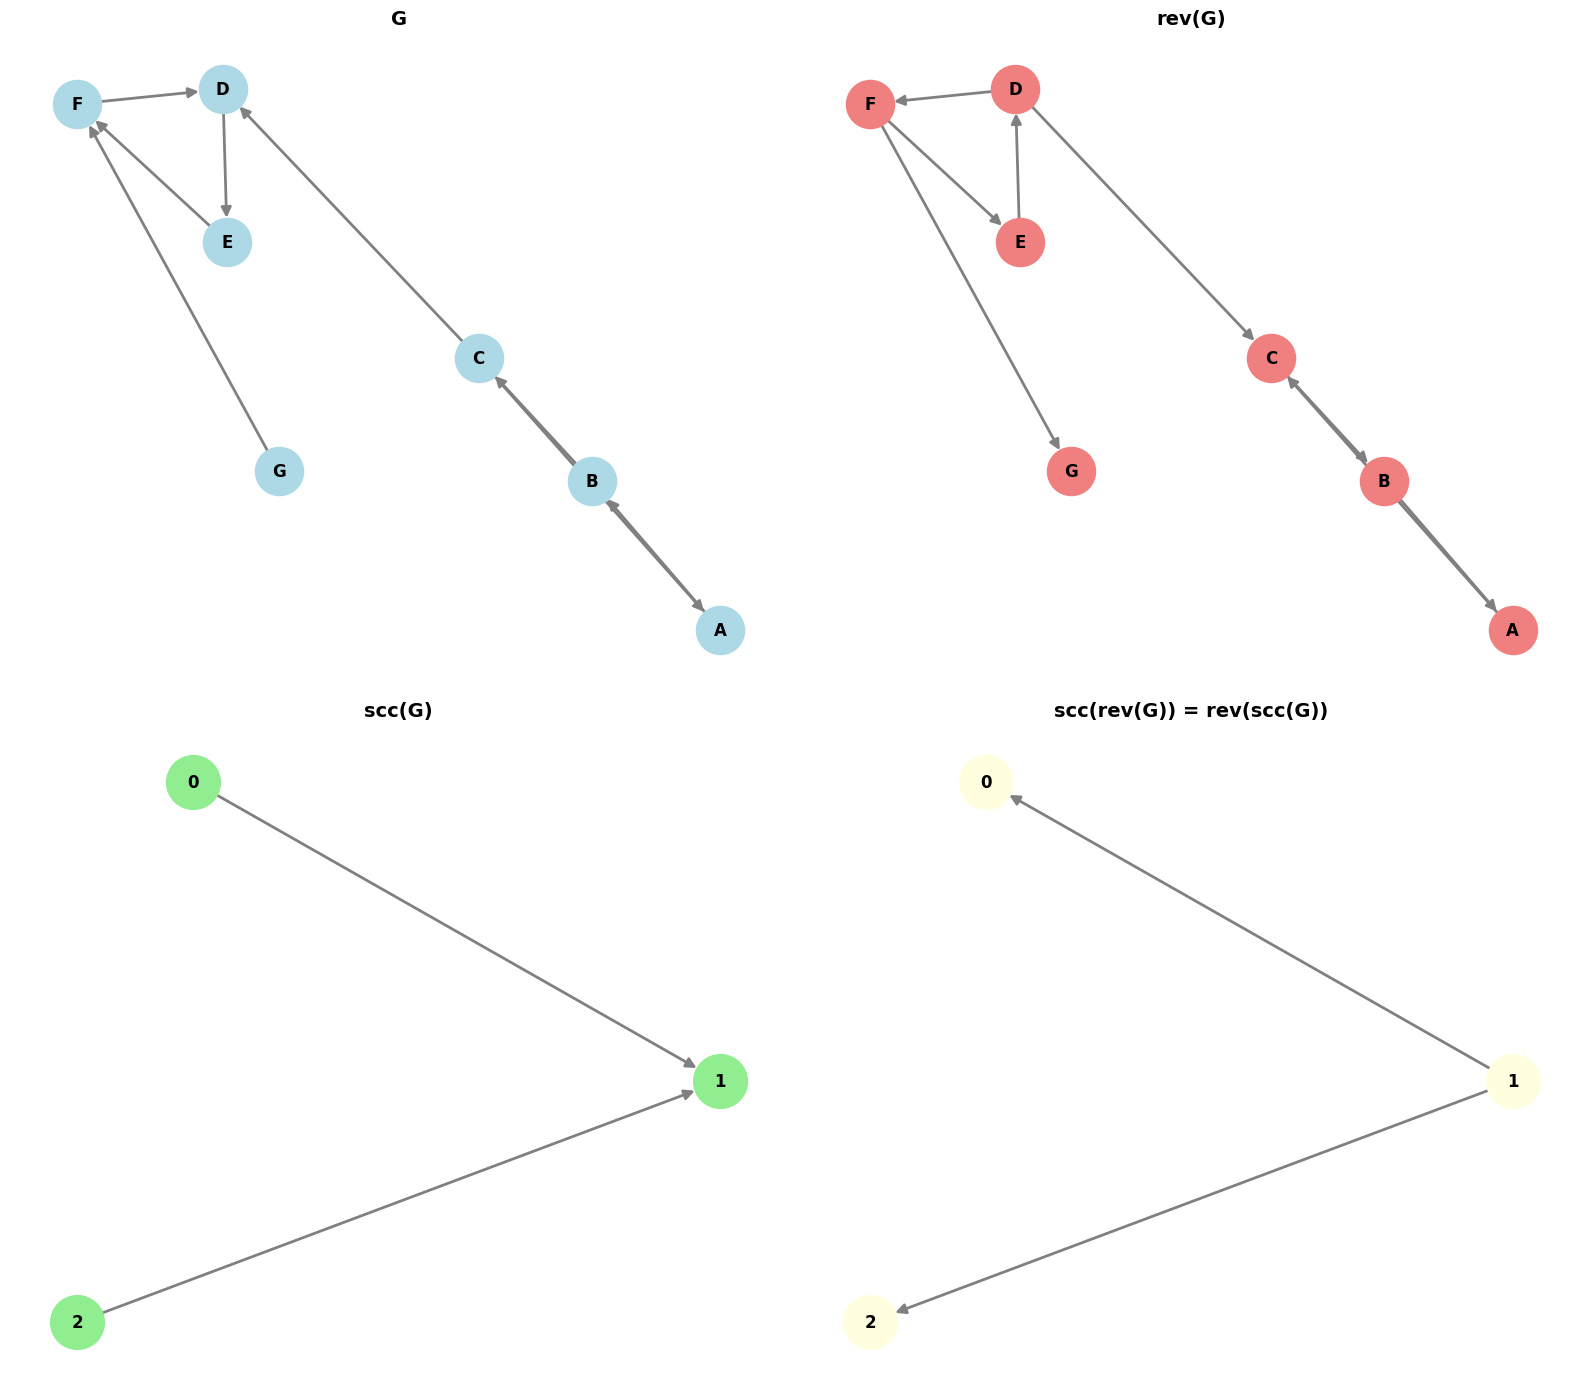


Edges in scc(G): [(0, 1), (2, 1)]
Edges in scc(rev(G)): [(1, 0), (1, 2)]
Edges in rev(scc(G)): [(1, 0), (1, 2)]

scc(rev(G)) equals rev(scc(G)): True


In [5]:
# Demonstrate the theorem with visualization
def verify_scc_reversal_theorem(adj_list):
    """Verify that scc(rev(G)) = rev(scc(G)) with visualization"""

    G = nx.DiGraph()
    for u, neighbors in adj_list.items():
        for v in neighbors:
            G.add_edge(u, v)

    G_rev_dict = compute_reversal(adj_list)
    G_rev = nx.DiGraph()
    for u, neighbors in G_rev_dict.items():
        for v in neighbors:
            G_rev.add_edge(u, v)

    sccs_G = list(nx.strongly_connected_components(G))
    sccs_rev_G = list(nx.strongly_connected_components(G_rev))

    sccs_G = [sorted(scc) for scc in sccs_G]
    sccs_rev_G = [sorted(scc) for scc in sccs_rev_G]
    sccs_G.sort()
    sccs_rev_G.sort()

    print("SCCs of G:", sccs_G)
    print("SCCs of rev(G):", sccs_rev_G)
    print(f"SCCs are the same: {sccs_G == sccs_rev_G}")

    def create_scc_graph(graph, sccs):
        vertex_to_scc = {}
        for i, scc in enumerate(sccs):
            for v in scc:
                vertex_to_scc[v] = i

        scc_g = nx.DiGraph()
        for u, v in graph.edges():
            scc_u = vertex_to_scc[u]
            scc_v = vertex_to_scc[v]
            if scc_u != scc_v:
                scc_g.add_edge(scc_u, scc_v)
        return scc_g

    scc_G = create_scc_graph(G, sccs_G)
    scc_rev_G = create_scc_graph(G_rev, sccs_rev_G)
    rev_scc_G = scc_G.reverse()

    fig, axes = plt.subplots(2, 2, figsize=(16, 14))

    pos = nx.spring_layout(G, seed=42)

    nx.draw(G, pos, ax=axes[0, 0], with_labels=True, node_color='lightblue',
            node_size=1200, font_size=12, font_weight='bold',
            arrows=True, arrowsize=15, edge_color='gray', width=2)
    axes[0, 0].set_title('G', fontsize=14, fontweight='bold')

    nx.draw(G_rev, pos, ax=axes[0, 1], with_labels=True, node_color='lightcoral',
            node_size=1200, font_size=12, font_weight='bold',
            arrows=True, arrowsize=15, edge_color='gray', width=2)
    axes[0, 1].set_title('rev(G)', fontsize=14, fontweight='bold')

    if len(scc_G.nodes()) > 0:
        pos_scc = nx.spring_layout(scc_G, seed=42)
        nx.draw(scc_G, pos_scc, ax=axes[1, 0], with_labels=True,
                node_color='lightgreen', node_size=1500,
                font_size=12, font_weight='bold',
                arrows=True, arrowsize=15, edge_color='gray', width=2)
    axes[1, 0].set_title('scc(G)', fontsize=14, fontweight='bold')

    if len(scc_rev_G.nodes()) > 0:
        if len(scc_G.nodes()) > 0:
            pos_scc_rev = pos_scc
        else:
            pos_scc_rev = nx.spring_layout(scc_rev_G, seed=42)

        nx.draw(scc_rev_G, pos_scc_rev, ax=axes[1, 1], with_labels=True,
                node_color='lightyellow', node_size=1500,
                font_size=12, font_weight='bold',
                arrows=True, arrowsize=15, edge_color='gray', width=2)
    axes[1, 1].set_title('scc(rev(G)) = rev(scc(G))', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    print("\nEdges in scc(G):", sorted(scc_G.edges()))
    print("Edges in scc(rev(G)):", sorted(scc_rev_G.edges()))
    print("Edges in rev(scc(G)):", sorted(rev_scc_G.edges()))
    print(f"\nscc(rev(G)) equals rev(scc(G)): {sorted(scc_rev_G.edges()) == sorted(rev_scc_G.edges())}")

verify_scc_reversal_theorem(G_multi_scc)

### 4. Reachability in G and scc(G)

**Theorem:** Fix an arbitrary directed graph G. For any vertex v of G, let S(v) denote the strong component of G that contains v. For all vertices u and v of G, prove that u can reach v in G if and only if S(u) can reach S(v) in scc(G).

**Proof:**

We need to prove both directions:

**(⇒) If u can reach v in G, then S(u) can reach S(v) in scc(G)**

1. Assume u can reach v in G
2. Let P = u = v₀ → v₁ → v₂ → ... → vₖ = v be a path from u to v in G
3. Let Sᵢ = S(vᵢ) be the SCC containing vᵢ
4. Consider consecutive vertices vᵢ and vᵢ₊₁ on the path:
   - **Case 1**: If Sᵢ = Sᵢ₊₁ (same SCC), then this edge doesn't create an edge in scc(G)
   - **Case 2**: If Sᵢ ≠ Sᵢ₊₁ (different SCCs), then there's an edge from Sᵢ to Sᵢ₊₁ in scc(G)
5. Following the path from u to v, we get a sequence of SCCs: S₀, S₁, ..., Sₖ
6. Removing duplicates (consecutive same SCCs), we get a path from S(u) to S(v) in scc(G)
7. Therefore, S(u) can reach S(v) in scc(G)

**(⇐) If S(u) can reach S(v) in scc(G), then u can reach v in G**

1. Assume S(u) can reach S(v) in scc(G)
2. Let Q = S(u) = S₀ → S₁ → ... → Sₘ = S(v) be a path in scc(G)
3. By definition of scc(G), edge Sᵢ → Sᵢ₊₁ means:
   - There exist vertices aᵢ ∈ Sᵢ and bᵢ₊₁ ∈ Sᵢ₊₁ such that (aᵢ, bᵢ₊₁) is an edge in G
4. Since u ∈ S₀ and within an SCC all vertices can reach each other:
   - u can reach a₀ (both in S₀)
   - a₀ can reach b₁ via the edge (a₀, b₁)
   - All vertices in S₁ can reach each other, so b₁ can reach a₁
   - a₁ can reach b₂ via edge (a₁, b₂)
   - Continue this pattern...
   - aₘ₋₁ can reach bₘ via edge (aₘ₋₁, bₘ)
   - bₘ can reach v (both in Sₘ = S(v))
5. Combining these paths: u → a₀ → b₁ → a₁ → b₂ → ... → bₘ → v
6. Therefore, u can reach v in G

**Conclusion:** u can reach v in G ⟺ S(u) can reach S(v) in scc(G)

**QED**

In [6]:
# Demonstrate the reachability theorem
def demonstrate_reachability_theorem(adj_list, test_pairs):
    """
    Demonstrate that u can reach v in G iff S(u) can reach S(v) in scc(G)
    """
    G = nx.DiGraph()
    for u, neighbors in adj_list.items():
        for v in neighbors:
            G.add_edge(u, v)

    sccs = list(nx.strongly_connected_components(G))
    vertex_to_scc = {}
    for i, scc in enumerate(sccs):
        for v in scc:
            vertex_to_scc[v] = i

    scc_graph = nx.DiGraph()
    for u, neighbors in adj_list.items():
        for v in neighbors:
            scc_u = vertex_to_scc[u]
            scc_v = vertex_to_scc[v]
            if scc_u != scc_v:
                scc_graph.add_edge(scc_u, scc_v)

    print("="*70)
    print("Reachability Theorem Verification")
    print("="*70)
    print(f"\nStrongly Connected Components:")
    for i, scc in enumerate(sccs):
        print(f"  S{i}: {sorted(scc)}")

    print(f"\nTesting reachability for pairs:")
    print("-"*70)

    for u, v in test_pairs:
        reachable_in_G = nx.has_path(G, u, v)

        scc_u = vertex_to_scc[u]
        scc_v = vertex_to_scc[v]

        if scc_u == scc_v:
            reachable_in_scc = True
        else:
            reachable_in_scc = nx.has_path(scc_graph, scc_u, scc_v)

        match = "✓" if reachable_in_G == reachable_in_scc else "✗"

        print(f"\n{u} → {v}:")
        print(f"  S({u}) = S{scc_u}, S({v}) = S{scc_v}")
        print(f"  Reachable in G: {reachable_in_G}")
        print(f"  S({u}) reaches S({v}) in scc(G): {reachable_in_scc}")
        print(f"  Theorem holds: {match}")

G_reach_test = {
    'A': ['B'],
    'B': ['C'],
    'C': ['A', 'D'],
    'D': ['E'],
    'E': ['F'],
    'F': ['D'],
    'G': ['H'],
    'H': []
}

test_pairs = [('A', 'C'), ('A', 'E'), ('E', 'A'), ('A', 'H'), ('G', 'H'), ('D', 'F')]

demonstrate_reachability_theorem(G_reach_test, test_pairs)

Reachability Theorem Verification

Strongly Connected Components:
  S0: ['D', 'E', 'F']
  S1: ['A', 'B', 'C']
  S2: ['H']
  S3: ['G']

Testing reachability for pairs:
----------------------------------------------------------------------

A → C:
  S(A) = S1, S(C) = S1
  Reachable in G: True
  S(A) reaches S(C) in scc(G): True
  Theorem holds: ✓

A → E:
  S(A) = S1, S(E) = S0
  Reachable in G: True
  S(A) reaches S(E) in scc(G): True
  Theorem holds: ✓

E → A:
  S(E) = S0, S(A) = S1
  Reachable in G: False
  S(E) reaches S(A) in scc(G): False
  Theorem holds: ✓

A → H:
  S(A) = S1, S(H) = S2
  Reachable in G: False
  S(A) reaches S(H) in scc(G): False
  Theorem holds: ✓

G → H:
  S(G) = S3, S(H) = S2
  Reachable in G: True
  S(G) reaches S(H) in scc(G): True
  Theorem holds: ✓

D → F:
  S(D) = S0, S(F) = S0
  Reachable in G: True
  S(D) reaches S(F) in scc(G): True
  Theorem holds: ✓


## Problem 2: Euler Tour

### 1. Show that G has an Euler tour if and only if in-degree(v) = out-degree(v) for each vertex v ∈ V

**Theorem:** A strongly connected directed graph G = (V, E) has an Euler tour if and only if in-degree(v) = out-degree(v) for every vertex v ∈ V.

**Proof:**

**(⇒) Necessity: If G has an Euler tour, then in-degree(v) = out-degree(v) for all v**

1. Assume G has an Euler tour (a cycle that uses every edge exactly once)
2. Consider any vertex v on this tour
3. Every time the tour visits v:
   - It enters via one incoming edge
   - It leaves via one outgoing edge
4. Since the tour is a cycle and uses every edge exactly once:
   - Every incoming edge to v is used exactly once (for entering)
   - Every outgoing edge from v is used exactly once (for leaving)
   - The number of times we enter v equals the number of times we leave v
5. Therefore, in-degree(v) = out-degree(v)

**(⇐) Sufficiency: If in-degree(v) = out-degree(v) for all v, then G has an Euler tour**

1. Assume in-degree(v) = out-degree(v) for all vertices v
2. Since G is strongly connected, we can start at any vertex; pick an arbitrary start vertex s
3. **Algorithm to construct Euler tour:**
   - Start at s and follow edges arbitrarily (never using the same edge twice)
   - At each vertex v (except possibly s), we have:
     * Equal in-degree and out-degree
     * If we entered via an edge, there's always an unused outgoing edge (balanced degrees)
   - We can continue until we return to s (must happen since graph is finite and strongly connected)
   - This gives us a cycle C
4. **If C uses all edges:** We have an Euler tour ✓
5. **If C doesn't use all edges:**
   - Let G' = G with edges of C removed
   - In G', every vertex still has equal in-degree and out-degree (we removed a balanced cycle)
   - Pick a vertex v on C that has unused edges in G'
   - Construct another cycle C' starting from v using edges in G'
   - Merge C and C' by splicing C' into C at vertex v
   - Repeat until all edges are used
6. The result is an Euler tour

**QED**

In [7]:
def check_euler_tour_condition(adj_list):
    """
    Check if a graph satisfies the Euler tour condition:
    in-degree(v) = out-degree(v) for all vertices
    """
    in_degree = defaultdict(int)
    out_degree = defaultdict(int)

    vertices = set(adj_list.keys())
    for neighbors in adj_list.values():
        vertices.update(neighbors)

    for u in adj_list:
        out_degree[u] = len(adj_list[u])
        for v in adj_list[u]:
            in_degree[v] += 1

    print("Vertex Degree Analysis:")
    print("-" * 50)
    has_euler_tour = True

    for v in sorted(vertices):
        in_deg = in_degree[v]
        out_deg = out_degree[v]
        balanced = "✓" if in_deg == out_deg else "✗"
        print(f"  {v}: in-degree = {in_deg}, out-degree = {out_deg} {balanced}")
        if in_deg != out_deg:
            has_euler_tour = False

    print("-" * 50)
    print(f"Has Euler tour (by degree condition): {has_euler_tour}")
    return has_euler_tour

# Example 1: Graph WITH Euler tour
print("Example 1: Graph with Euler Tour")
print("="*50)
G_euler_yes = {
    'A': ['B'],
    'B': ['C'],
    'C': ['D'],
    'D': ['A']
}
check_euler_tour_condition(G_euler_yes)

print("\n" + "="*50)
print("Example 2: Graph WITHOUT Euler Tour")
print("="*50)
G_euler_no = {
    'A': ['B', 'C'],
    'B': ['C'],
    'C': ['A']
}
check_euler_tour_condition(G_euler_no)

Example 1: Graph with Euler Tour
Vertex Degree Analysis:
--------------------------------------------------
  A: in-degree = 1, out-degree = 1 ✓
  B: in-degree = 1, out-degree = 1 ✓
  C: in-degree = 1, out-degree = 1 ✓
  D: in-degree = 1, out-degree = 1 ✓
--------------------------------------------------
Has Euler tour (by degree condition): True

Example 2: Graph WITHOUT Euler Tour
Vertex Degree Analysis:
--------------------------------------------------
  A: in-degree = 1, out-degree = 2 ✗
  B: in-degree = 1, out-degree = 1 ✓
  C: in-degree = 2, out-degree = 1 ✗
--------------------------------------------------
Has Euler tour (by degree condition): False


False

### 2. O(E)-time Algorithm to Find an Euler Tour

**Algorithm: Hierholzer's Algorithm**

**Input:** A strongly connected directed graph G = (V, E) where in-degree(v) = out-degree(v) for all v

**Output:** An Euler tour of G

**Algorithm:**
```
1. Choose any starting vertex s
2. current_path = [s]
3. tour = []
4. current_vertex = s

5. While current_path is not empty:
   a. If current_vertex has unused outgoing edges:
      - Choose an unused edge (current_vertex, next_vertex)
      - Mark the edge as used
      - Push current_vertex onto current_path
      - current_vertex = next_vertex
   
   b. Else (no unused outgoing edges):
      - Add current_vertex to tour
      - current_vertex = pop from current_path

6. Reverse tour and return
```

**Time Complexity: O(E)**
- Each edge is visited exactly once: O(E)
- Each vertex is pushed/popped from stack at most once per edge: O(E)
- Total: O(E)

**Why it works:**
- The algorithm explores edges forming cycles
- When stuck (no outgoing edges), backtracks and records the path
- Balanced degrees ensure we never get stuck before using all edges
- The result is an Euler tour

In [8]:
def find_euler_tour(adj_list):
    """
    Find an Euler tour using Hierholzer's algorithm.
    Time Complexity: O(E)

    Parameters:
    adj_list: adjacency list representation of the graph

    Returns:
    tour: list of vertices forming an Euler tour, or None if no tour exists
    """
    # Check if Euler tour exists
    in_degree = defaultdict(int)
    out_degree = defaultdict(int)

    for u in adj_list:
        out_degree[u] = len(adj_list[u])
        for v in adj_list[u]:
            in_degree[v] += 1

    # Check balanced degrees
    vertices = set(adj_list.keys())
    for neighbors in adj_list.values():
        vertices.update(neighbors)

    for v in vertices:
        if in_degree[v] != out_degree[v]:
            return None  # No Euler tour

    # Create a copy of adjacency list (to mark used edges)
    graph = {u: list(neighbors) for u, neighbors in adj_list.items()}

    # Hierholzer's algorithm
    start = next(iter(graph.keys()))
    current_path = [start]
    tour = []
    current = start

    while current_path:
        if current in graph and graph[current]:
            # Current vertex has unused edges
            next_vertex = graph[current].pop(0)
            current_path.append(current)
            current = next_vertex
        else:
            # No unused edges, backtrack
            tour.append(current)
            current = current_path.pop()

    tour.reverse()
    return tour

# Test the algorithm
print("Finding Euler Tour using Hierholzer's Algorithm")
print("="*60)

# Example: Simple cycle
G_euler_1 = {
    'A': ['B'],
    'B': ['C'],
    'C': ['D'],
    'D': ['A']
}

print("\nExample 1: Simple Cycle")
tour = find_euler_tour(G_euler_1)
if tour:
    print(f"Euler tour found: {' → '.join(tour)}")
    print(f"Tour length: {len(tour) - 1} edges")
else:
    print("No Euler tour exists")

# Example: More complex graph
G_euler_2 = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': ['D'],
    'D': ['A', 'E'],
    'E': ['A']
}

print("\nExample 2: Complex Graph")
tour = find_euler_tour(G_euler_2)
if tour:
    print(f"Euler tour found: {' → '.join(tour)}")
    print(f"Tour length: {len(tour) - 1} edges")
else:
    print("No Euler tour exists")

# Example: No Euler tour
print("\nExample 3: No Euler Tour (unbalanced degrees)")
tour = find_euler_tour(G_euler_no)
if tour:
    print(f"Euler tour found: {' → '.join(tour)}")
else:
    print("No Euler tour exists (degrees not balanced)")

Finding Euler Tour using Hierholzer's Algorithm

Example 1: Simple Cycle
Euler tour found: A → B → C → D → A
Tour length: 4 edges

Example 2: Complex Graph
Euler tour found: A → B → D → A → C → D → E → A
Tour length: 7 edges

Example 3: No Euler Tour (unbalanced degrees)
No Euler tour exists (degrees not balanced)


Visualizing Euler Tours:



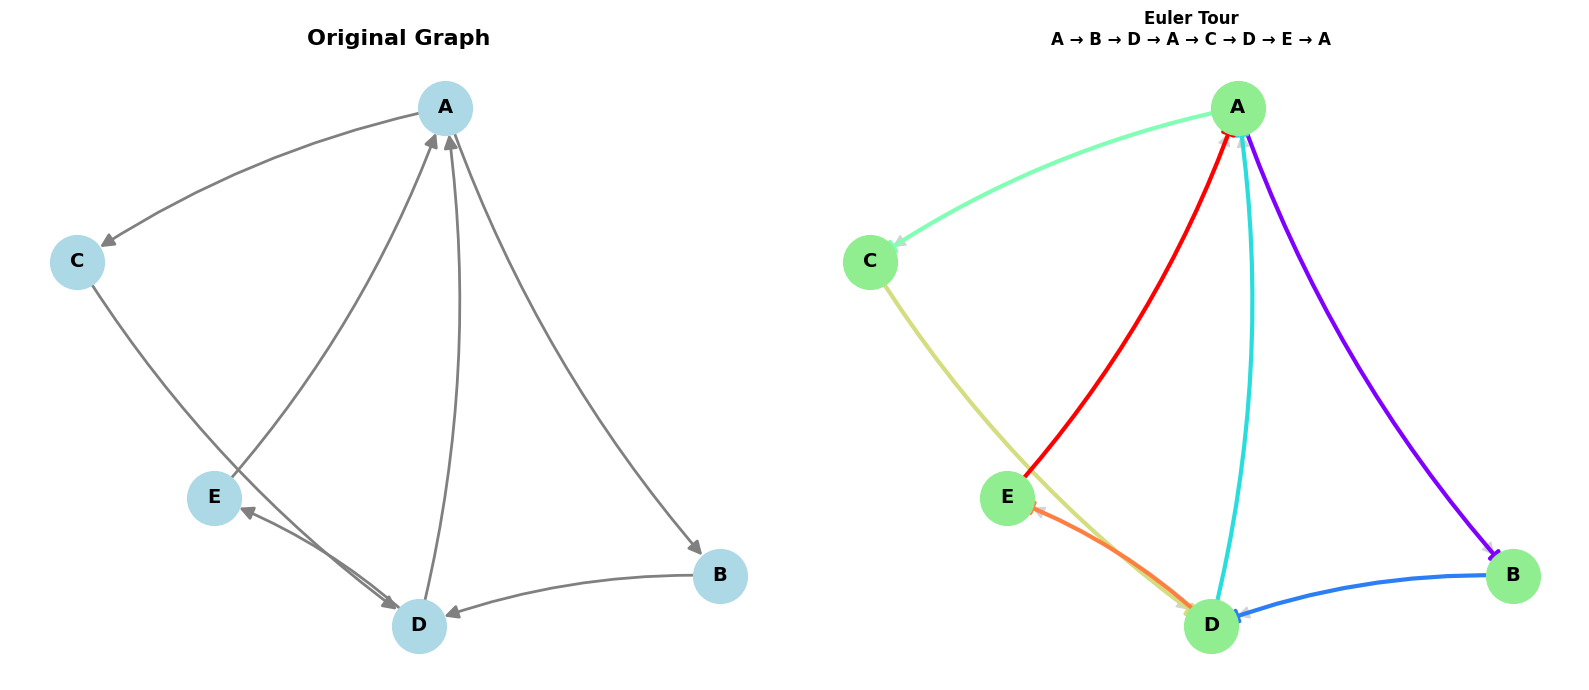

In [9]:
# Visualize Euler tour
def visualize_euler_tour(adj_list):
    """
    Visualize a graph and its Euler tour
    """
    tour = find_euler_tour(adj_list)

    G = nx.DiGraph()
    for u, neighbors in adj_list.items():
        for v in neighbors:
            if G.has_edge(u, v):
                G[u][v]['weight'] = G[u][v].get('weight', 0) + 1
            else:
                G.add_edge(u, v, weight=1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

    pos = nx.spring_layout(G, seed=42)

    nx.draw(G, pos, ax=ax1, with_labels=True, node_color='lightblue',
            node_size=1500, font_size=14, font_weight='bold',
            arrows=True, arrowsize=20, edge_color='gray', width=2,
            connectionstyle='arc3,rad=0.1')

    edge_labels = nx.get_edge_attributes(G, 'weight')
    edge_labels = {k: v for k, v in edge_labels.items() if v > 1}
    if edge_labels:
        nx.draw_networkx_edge_labels(G, pos, edge_labels, ax=ax1)

    ax1.set_title('Original Graph', fontsize=16, fontweight='bold')

    if tour:
        edge_colors = []
        edge_widths = []

        for u, v in G.edges():
            edge_colors.append('lightgray')
            edge_widths.append(1)

        nx.draw(G, pos, ax=ax2, with_labels=True, node_color='lightgreen',
                node_size=1500, font_size=14, font_weight='bold',
                arrows=True, arrowsize=20, edge_color=edge_colors,
                width=edge_widths, connectionstyle='arc3,rad=0.1')

        tour_edges = [(tour[i], tour[i+1]) for i in range(len(tour)-1)]
        colors = plt.cm.rainbow(np.linspace(0, 1, len(tour_edges)))

        for idx, (u, v) in enumerate(tour_edges):
            nx.draw_networkx_edges(G, pos, [(u, v)], ax=ax2,
                                 edge_color=[colors[idx]], width=3,
                                 arrows=True, arrowsize=20,
                                 connectionstyle='arc3,rad=0.1')

        tour_str = ' → '.join(tour)
        ax2.set_title(f'Euler Tour\n{tour_str}', fontsize=12, fontweight='bold')
    else:
        ax2.text(0.5, 0.5, 'No Euler Tour Exists', ha='center', va='center',
                fontsize=16, transform=ax2.transAxes)
        ax2.set_title('No Euler Tour', fontsize=16, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Visualize examples
print("Visualizing Euler Tours:\n")
visualize_euler_tour(G_euler_2)

## Problem 3: Topological Sort

Perform Topological Sort on the course dependency graph.

**Course Prerequisites:**
- A → B, A → C
- B → C, B → D
- C → E
- D → E, D → F
- G → F, G → E

Course Prerequisite Graph
Prerequisites (X → Y means 'X must be taken before Y'):
  A → B, C
  B → C, D
  C → E
  D → E, F
  G → F, E


/tmp/ipython-input-1091482658.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


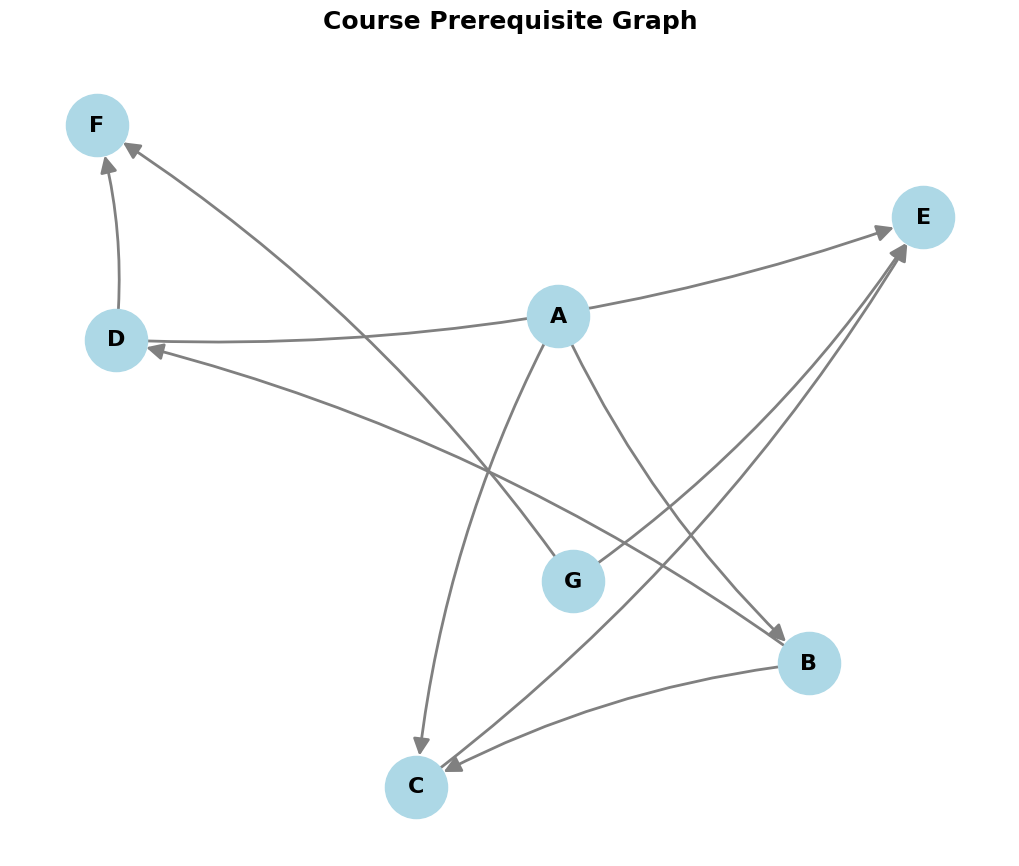

In [10]:
# Define the course prerequisite graph
course_graph = {
    'A': ['B', 'C'],
    'B': ['C', 'D'],
    'C': ['E'],
    'D': ['E', 'F'],
    'G': ['F', 'E'],
    'E': [],
    'F': []
}

# Visualize the course graph
print("Course Prerequisite Graph")
print("="*60)
print("Prerequisites (X → Y means 'X must be taken before Y'):")
for course, prereqs in sorted(course_graph.items()):
    if prereqs:
        print(f"  {course} → {', '.join(prereqs)}")

# Create and visualize the graph
G_courses = nx.DiGraph()
for u, neighbors in course_graph.items():
    for v in neighbors:
        G_courses.add_edge(u, v)

plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_courses, seed=42, k=2)
nx.draw(G_courses, pos, with_labels=True, node_color='lightblue',
        node_size=2000, font_size=16, font_weight='bold',
        arrows=True, arrowsize=25, edge_color='gray', width=2,
        connectionstyle='arc3,rad=0.1')
plt.title('Course Prerequisite Graph', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

### Topological Sort Algorithm (DFS-based)

**Algorithm:**
```
1. Initialize:
   - visited = empty set
   - stack = empty stack

2. For each vertex v in the graph:
   - If v not in visited:
     - DFS(v)

3. DFS(v):
   - Mark v as visited
   - For each neighbor u of v:
     - If u not visited:
       - DFS(u)
   - Push v onto stack

4. Return stack (top to bottom gives topological order)
```

**Time Complexity: O(V + E)**

In [11]:
def topological_sort_dfs(adj_list):
    """
    Perform topological sort using DFS.
    Returns list of vertices in topological order.
    """
    visited = set()
    stack = []

    def dfs(v, path=[]):
        visited.add(v)
        print(f"  Visiting: {v}, Current path: {path + [v]}")

        if v in adj_list:
            for neighbor in adj_list[v]:
                if neighbor not in visited:
                    dfs(neighbor, path + [v])

        stack.append(v)
        print(f"  Finished: {v}, Adding to result")

    # Get all vertices
    vertices = set(adj_list.keys())
    for neighbors in adj_list.values():
        vertices.update(neighbors)

    # Visit each vertex
    for v in sorted(vertices):
        if v not in visited:
            print(f"\nStarting DFS from: {v}")
            dfs(v)

    # Reverse the stack to get topological order
    stack.reverse()
    return stack

print("\n" + "="*60)
print("Topological Sort - Starting from A")
print("="*60)
topo_order = topological_sort_dfs(course_graph)
print("\n" + "="*60)
print(f"Topological Order: {' → '.join(topo_order)}")
print("="*60)


Topological Sort - Starting from A

Starting DFS from: A
  Visiting: A, Current path: ['A']
  Visiting: B, Current path: ['A', 'B']
  Visiting: C, Current path: ['A', 'B', 'C']
  Visiting: E, Current path: ['A', 'B', 'C', 'E']
  Finished: E, Adding to result
  Finished: C, Adding to result
  Visiting: D, Current path: ['A', 'B', 'D']
  Visiting: F, Current path: ['A', 'B', 'D', 'F']
  Finished: F, Adding to result
  Finished: D, Adding to result
  Finished: B, Adding to result
  Finished: A, Adding to result

Starting DFS from: G
  Visiting: G, Current path: ['G']
  Finished: G, Adding to result

Topological Order: G → A → B → D → F → C → E


In [12]:
def topological_sort_from_vertex(adj_list, start_vertex):
    """
    Perform topological sort starting from a specific vertex.
    """
    visited = set()
    stack = []

    def dfs(v):
        visited.add(v)
        if v in adj_list:
            for neighbor in adj_list[v]:
                if neighbor not in visited:
                    dfs(neighbor)
        stack.append(v)

    # Get all vertices
    vertices = set(adj_list.keys())
    for neighbors in adj_list.values():
        vertices.update(neighbors)

    # Start from specified vertex
    if start_vertex in vertices:
        dfs(start_vertex)

    # Visit remaining vertices
    for v in sorted(vertices):
        if v not in visited:
            dfs(v)

    stack.reverse()
    return stack

# Try different starting points
print("\nTopological Sorts from Different Starting Points:")
print("="*60)

start_vertices = ['A', 'G', 'B']
for start in start_vertices:
    order = topological_sort_from_vertex(course_graph, start)
    print(f"Starting from {start}: {' → '.join(order)}")


Topological Sorts from Different Starting Points:
Starting from A: G → A → B → D → F → C → E
Starting from G: A → B → D → C → G → E → F
Starting from B: G → A → B → D → F → C → E


In [13]:
# Alternative: Kahn's Algorithm (BFS-based topological sort)
def topological_sort_kahn(adj_list):
    """
    Kahn's algorithm for topological sorting.
    Uses in-degree and BFS approach.
    """
    # Calculate in-degrees
    in_degree = defaultdict(int)
    vertices = set(adj_list.keys())

    for neighbors in adj_list.values():
        vertices.update(neighbors)

    for v in vertices:
        in_degree[v] = 0

    for u in adj_list:
        for v in adj_list[u]:
            in_degree[v] += 1

    # Find all vertices with in-degree 0
    queue = deque([v for v in vertices if in_degree[v] == 0])
    result = []

    print("\nKahn's Algorithm Steps:")
    print("-" * 60)
    print(f"Initial in-degrees: {dict(in_degree)}")
    print(f"Initial queue (in-degree 0): {list(queue)}")

    step = 1
    while queue:
        v = queue.popleft()
        result.append(v)
        print(f"\nStep {step}: Process {v}")

        if v in adj_list:
            for neighbor in adj_list[v]:
                in_degree[neighbor] -= 1
                print(f"  Decrease in-degree of {neighbor} to {in_degree[neighbor]}")
                if in_degree[neighbor] == 0:
                    queue.append(neighbor)
                    print(f"  Add {neighbor} to queue")

        print(f"  Current result: {result}")
        print(f"  Queue: {list(queue)}")
        step += 1

    return result

print("\n" + "="*60)
print("Kahn's Algorithm (BFS-based Topological Sort)")
print("="*60)
kahn_order = topological_sort_kahn(course_graph)
print("\n" + "="*60)
print(f"Topological Order: {' → '.join(kahn_order)}")
print("="*60)


Kahn's Algorithm (BFS-based Topological Sort)

Kahn's Algorithm Steps:
------------------------------------------------------------
Initial in-degrees: {'G': 0, 'D': 1, 'B': 1, 'F': 2, 'E': 3, 'A': 0, 'C': 2}
Initial queue (in-degree 0): ['G', 'A']

Step 1: Process G
  Decrease in-degree of F to 1
  Decrease in-degree of E to 2
  Current result: ['G']
  Queue: ['A']

Step 2: Process A
  Decrease in-degree of B to 0
  Add B to queue
  Decrease in-degree of C to 1
  Current result: ['G', 'A']
  Queue: ['B']

Step 3: Process B
  Decrease in-degree of C to 0
  Add C to queue
  Decrease in-degree of D to 0
  Add D to queue
  Current result: ['G', 'A', 'B']
  Queue: ['C', 'D']

Step 4: Process C
  Decrease in-degree of E to 1
  Current result: ['G', 'A', 'B', 'C']
  Queue: ['D']

Step 5: Process D
  Decrease in-degree of E to 0
  Add E to queue
  Decrease in-degree of F to 0
  Add F to queue
  Current result: ['G', 'A', 'B', 'C', 'D']
  Queue: ['E', 'F']

Step 6: Process E
  Current result:


Kahn's Algorithm Steps:
------------------------------------------------------------
Initial in-degrees: {'G': 0, 'D': 1, 'B': 1, 'F': 2, 'E': 3, 'A': 0, 'C': 2}
Initial queue (in-degree 0): ['G', 'A']

Step 1: Process G
  Decrease in-degree of F to 1
  Decrease in-degree of E to 2
  Current result: ['G']
  Queue: ['A']

Step 2: Process A
  Decrease in-degree of B to 0
  Add B to queue
  Decrease in-degree of C to 1
  Current result: ['G', 'A']
  Queue: ['B']

Step 3: Process B
  Decrease in-degree of C to 0
  Add C to queue
  Decrease in-degree of D to 0
  Add D to queue
  Current result: ['G', 'A', 'B']
  Queue: ['C', 'D']

Step 4: Process C
  Decrease in-degree of E to 1
  Current result: ['G', 'A', 'B', 'C']
  Queue: ['D']

Step 5: Process D
  Decrease in-degree of E to 0
  Add E to queue
  Decrease in-degree of F to 0
  Add F to queue
  Current result: ['G', 'A', 'B', 'C', 'D']
  Queue: ['E', 'F']

Step 6: Process E
  Current result: ['G', 'A', 'B', 'C', 'D', 'E']
  Queue: ['F']


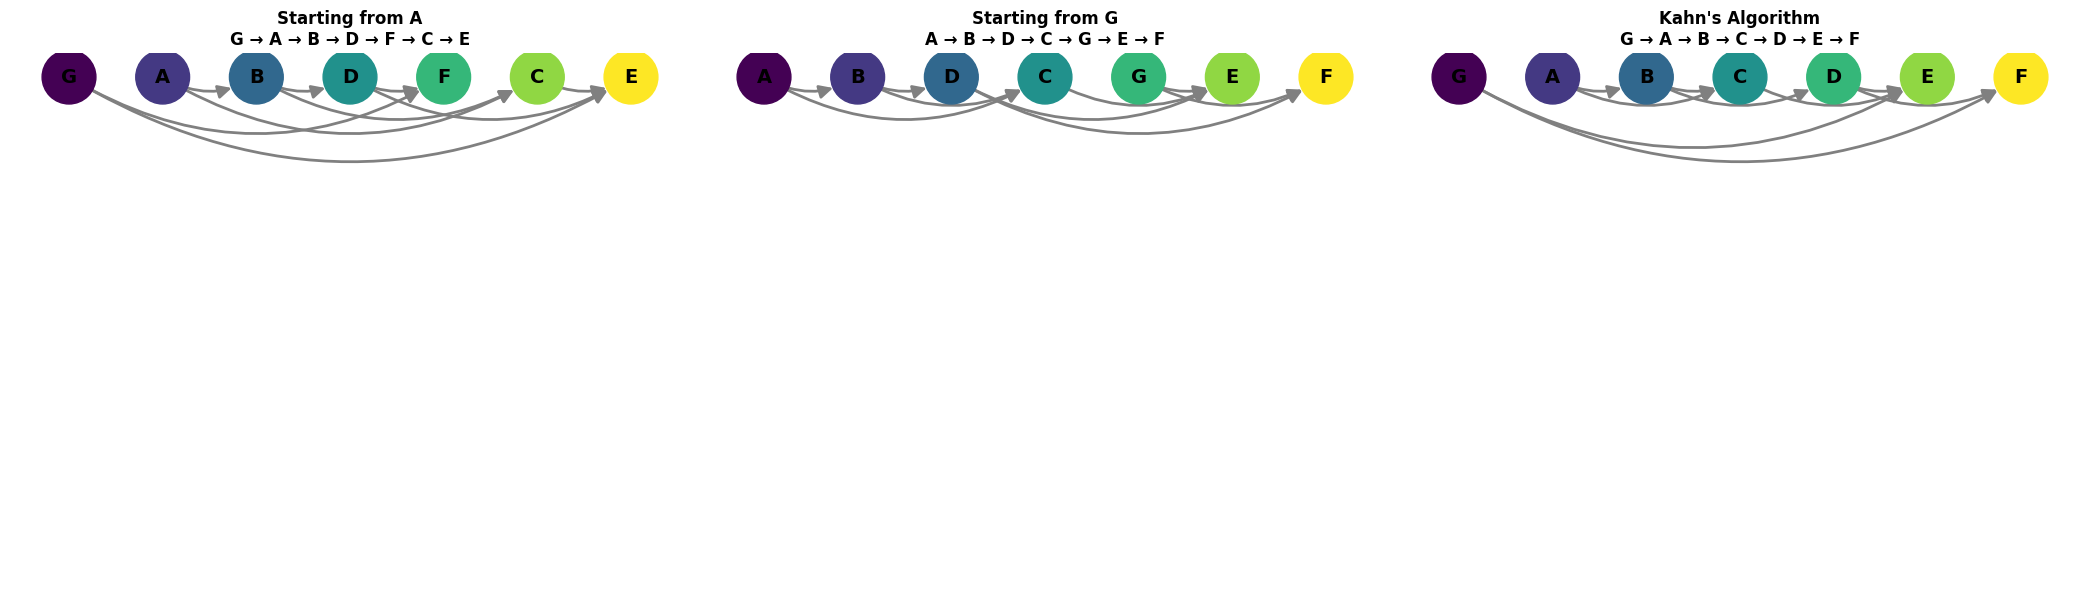

In [14]:
# Visualize multiple topological orderings
def visualize_topological_orders(adj_list, orders):
    """
    Visualize different topological orderings of the same graph
    """
    num_orders = len(orders)
    fig, axes = plt.subplots(1, num_orders, figsize=(7 * num_orders, 6))

    if num_orders == 1:
        axes = [axes]

    # Create graph
    G = nx.DiGraph()
    for u, neighbors in adj_list.items():
        for v in neighbors:
            G.add_edge(u, v)

    for idx, (title, order) in enumerate(orders):
        # Position nodes according to topological order (left to right)
        pos = {}
        for i, node in enumerate(order):
            pos[node] = (i, 0)

        # Color nodes by position in order
        colors = plt.cm.viridis(np.linspace(0, 1, len(order)))
        node_colors = [colors[order.index(node)] for node in G.nodes()]

        nx.draw(G, pos, ax=axes[idx], with_labels=True,
                node_color=node_colors, node_size=1500,
                font_size=14, font_weight='bold',
                arrows=True, arrowsize=20, edge_color='gray', width=2,
                connectionstyle='arc3,rad=0.3')

        axes[idx].set_title(f'{title}\n{" → ".join(order)}',
                           fontsize=12, fontweight='bold')

    plt.tight_layout()
    plt.show()

# Get different orderings
order_A = topological_sort_from_vertex(course_graph, 'A')
order_G = topological_sort_from_vertex(course_graph, 'G')
order_kahn = topological_sort_kahn(course_graph)

orders = [
    ("Starting from A", order_A),
    ("Starting from G", order_G),
    ("Kahn's Algorithm", order_kahn)
]

print("\nVisualizing Different Valid Topological Orderings:")
visualize_topological_orders(course_graph, orders)

## Summary

This notebook demonstrates:

### Problem 1: SCC and Reversal
1. **Graph Reversal Algorithm** - O(V + E) time complexity
2. **Proof that scc(G) is acyclic** - Component graph forms a DAG
3. **Proof that scc(rev(G)) = rev(scc(G))** - SCCs preserved, edges reversed
4. **Reachability Theorem** - u reaches v in G ⟺ S(u) reaches S(v) in scc(G)

### Problem 2: Euler Tour
1. **Euler Tour Condition** - Exists ⟺ in-degree = out-degree for all vertices
2. **Hierholzer's Algorithm** - O(E) time to find Euler tour
3. **Visualizations** - Graph and tour with colored edges

### Problem 3: Topological Sort
1. **DFS-based Topological Sort** - Classic recursive approach
2. **Kahn's Algorithm** - BFS-based with in-degree tracking
3. **Multiple Valid Orderings** - Different starting points yield different valid orders
4. **Course Prerequisite Application** - Real-world example with visualization